# KNN Discussion

Let's begin by trying EDA for the dataset

In [25]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wine dataset
wine_data = load_wine()
df_wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df_wine.head()
# https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_wine.html

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


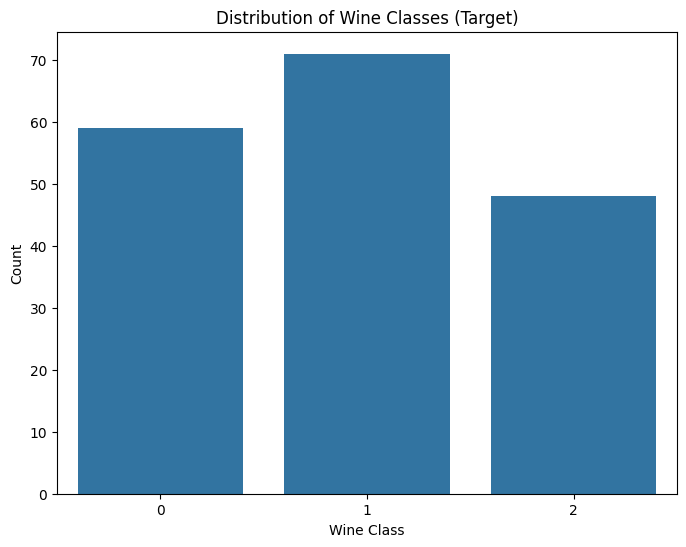

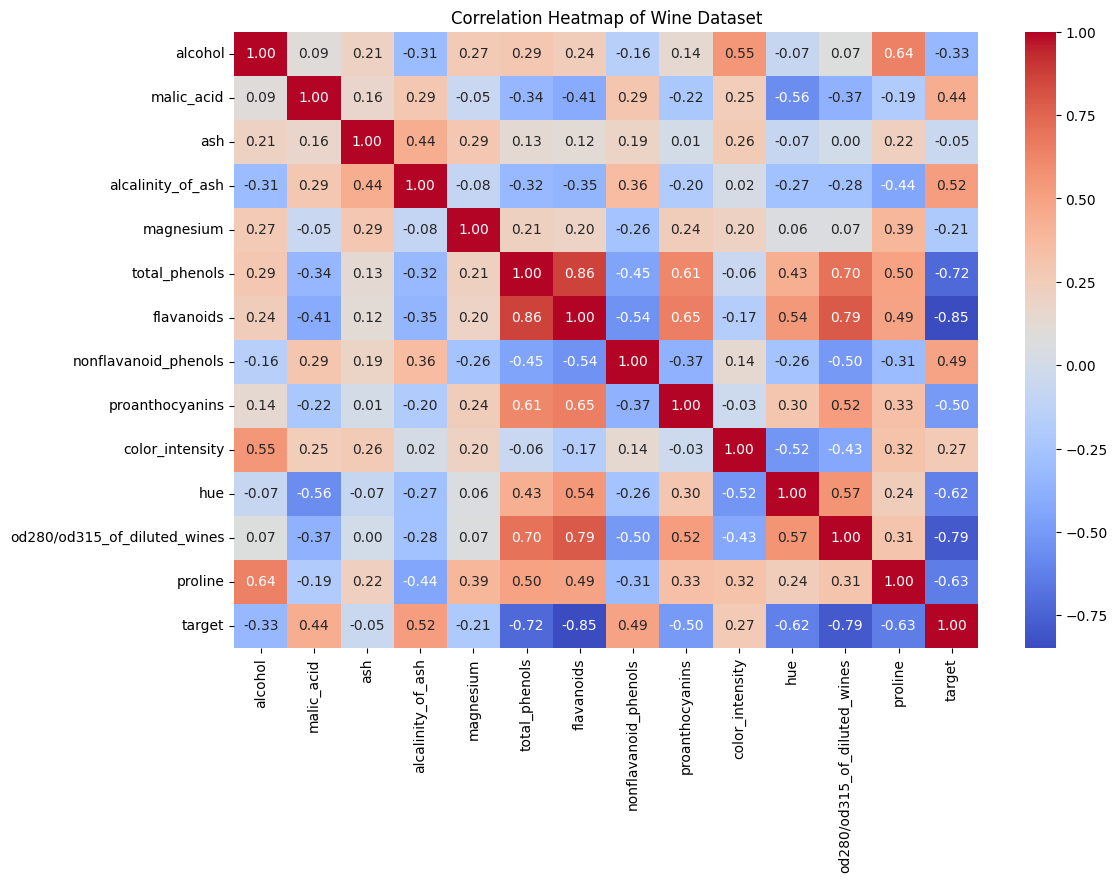

In [27]:
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

# Summary statistics of the dataset
summary_stats = df.describe()

# Let's visualize the distribution of the target classes
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title("Distribution of Wine Classes (Target)")
plt.xlabel("Wine Class")
plt.ylabel("Count")
plt.show()

# Visualizing the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap of Wine Dataset")
plt.show()


## Fit the KNN

1. Why do we need to scale the dataset?
2. What is the right value of K?
3. How are we expressing Accuracy and Precision?

Accuracy: 94.44%
Precision: 94.94%

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



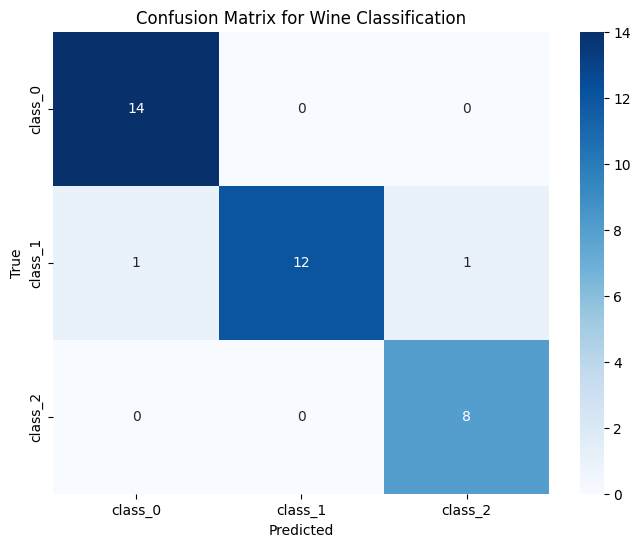

In [28]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the wine dataset
wine_data = load_wine()
X = wine_data.data
Y = wine_data.target

# Step 2: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 3: Standardizing the features (KNN is distance-based, so it's better to scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train_scaled, Y_train)

# Step 5: Make predictions on the test set
Y_pred = knn.predict(X_test_scaled)

# Step 6: Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Print accuracy and precision
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print("\nClassification Report:\n", class_report)

# Step 7: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine_data.target_names, yticklabels=wine_data.target_names)
plt.title('Confusion Matrix for Wine Classification')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## HyperParameter Selection?

How do we select Hyperparameters? 